In [1]:
 import pandas as pd

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
 df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [5]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [6]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [7]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [8]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [9]:
df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x : 1 if x == '>50K' else 0)

In [10]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

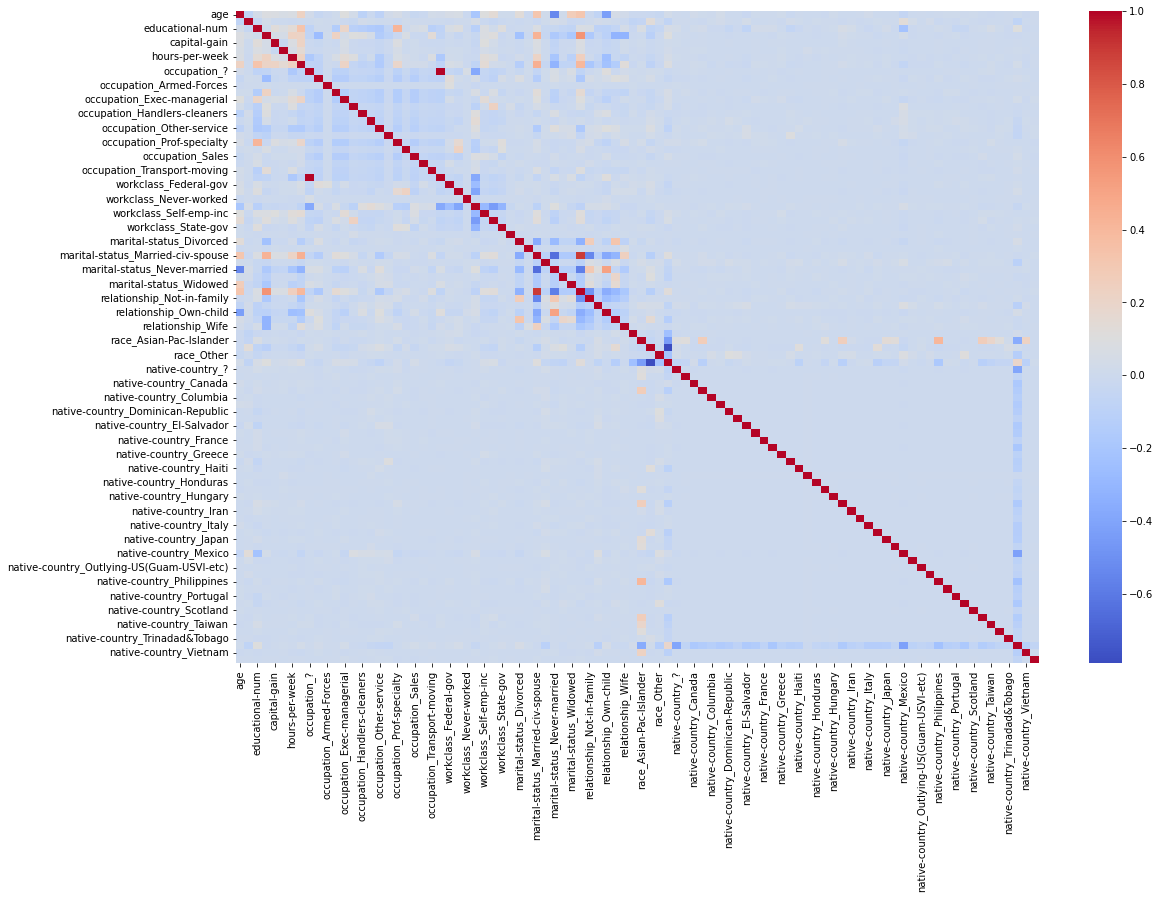

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [12]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [13]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

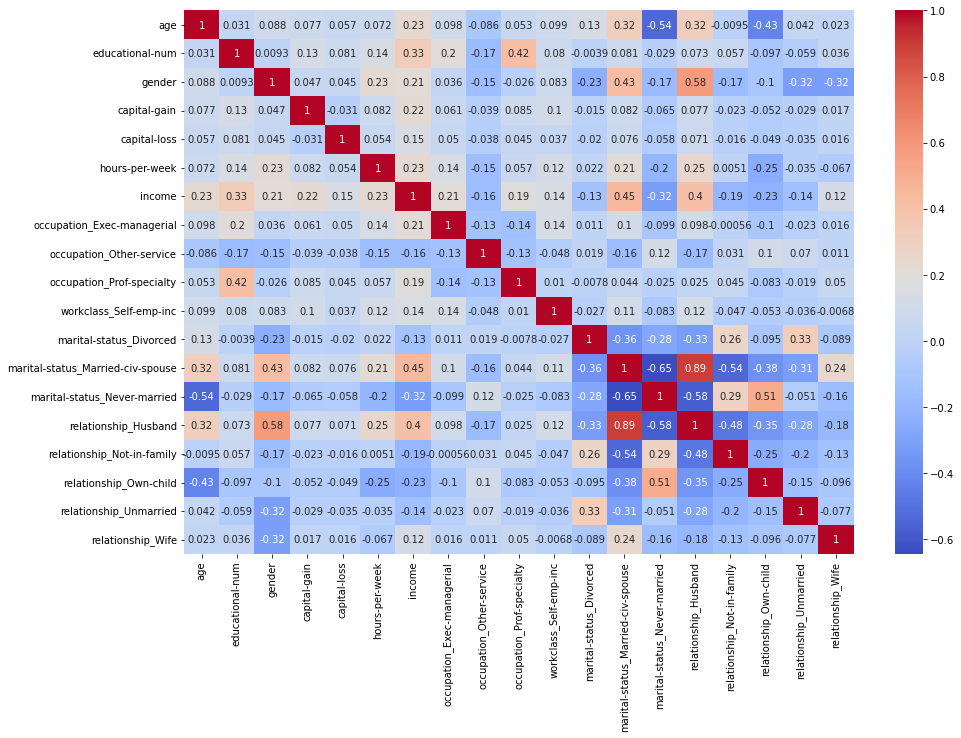

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size = 0.2)

In [16]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
28561,24,10,0,0,0,20,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
24173,38,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
28671,34,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
36169,21,6,0,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22563,39,10,1,0,0,43,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23623,37,10,1,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15847,66,7,1,10605,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1179,32,8,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
36778,65,6,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
19741,38,9,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45071,46,13,1,3103,0,37,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
38433,30,9,1,0,0,65,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39163,45,13,1,0,0,60,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
28945,28,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35472,27,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
27994,24,9,0,0,0,37,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
12071,25,10,0,0,0,20,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45820,49,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [18]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [19]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [20]:
forest.score(test_X, test_y)

0.8530044016787798

In [21]:
forest.feature_importances_

array([2.23829426e-01, 1.27248275e-01, 1.42592723e-02, 1.14731763e-01,
       3.94046522e-02, 1.14521811e-01, 1.92855771e-03, 4.85217013e-03,
       9.99393023e-05, 5.88911514e-03, 2.08096814e-02, 4.68090428e-03,
       3.56396197e-03, 4.14573517e-03, 7.64693198e-03, 2.14388268e-04,
       1.96765963e-02, 2.83386013e-03, 5.94915098e-03, 4.25474680e-03,
       4.05710776e-03, 1.91817846e-03, 4.63188241e-03, 5.42759446e-03,
       3.17846273e-06, 9.14501389e-03, 6.72923615e-03, 7.85113606e-03,
       4.23345074e-03, 1.63268190e-04, 7.32261089e-03, 2.86906352e-04,
       6.74358901e-02, 9.59769319e-04, 3.57637158e-02, 1.93154425e-03,
       1.82067950e-03, 3.87938176e-02, 1.10612408e-02, 1.62821521e-03,
       7.95093266e-03, 5.66756735e-03, 9.44059861e-03, 1.50402852e-03,
       3.13549091e-03, 4.69699211e-03, 9.29062096e-04, 6.35458517e-03,
       2.76308430e-03, 2.37399925e-04, 1.44406888e-03, 4.86729942e-04,
       3.21369707e-04, 8.35701944e-04, 2.26893508e-04, 1.85909901e-04,
      

In [22]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [23]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [24]:
importances

{'age': 0.22382942591999366,
 'educational-num': 0.12724827536375768,
 'capital-gain': 0.11473176289443685,
 'hours-per-week': 0.11452181061724179,
 'marital-status_Married-civ-spouse': 0.06743589010462792,
 'capital-loss': 0.039404652170747574,
 'relationship_Husband': 0.038793817557212326,
 'marital-status_Never-married': 0.035763715782593394,
 'occupation_Exec-managerial': 0.020809681353544576,
 'occupation_Prof-specialty': 0.019676596289293104,
 'gender': 0.014259272281625815,
 'relationship_Not-in-family': 0.011061240752333805,
 'relationship_Wife': 0.009440598609676496,
 'workclass_Private': 0.009145013892363302,
 'relationship_Own-child': 0.007950932655616255,
 'workclass_Self-emp-not-inc': 0.0078511360628039,
 'occupation_Other-service': 0.007646931976347003,
 'marital-status_Divorced': 0.007322610888612018,
 'workclass_Self-emp-inc': 0.006729236145250438,
 'race_White': 0.006354585168618577,
 'native-country_United-States': 0.006348679253060297,
 'occupation_Sales': 0.00594915

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth' : [5, 10, 30, None],
    'min_samples_split' : [2, 4],
    'max_features' : ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid, verbose=10)

In [27]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.8s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   2.2s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   2.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   1.7s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.9s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.818 total time=   0.9s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.817 total time=   2.3s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.826 total time=   2.3s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.812 total time=   2.3s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.860 total time=   0.9s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.9s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.858 total time=   0.9s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.857 total time=   1.7s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.863 total time=   1.7s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.850 total time=   3.4s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.861 total time=   3.6s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.857 total time=   3.9s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.853 total time=   4.3s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.857 total time=   3.6s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.859 total time=   1.5s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.858 total time=   1.5s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.854 total time=   3.0s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.861 total time=   3.6s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.863 total time=   3.0s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.850 total time=   9.8s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.849 total time=   9.7s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.849 total time=  11.1s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.848 total time=  10.9s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.849 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.849 total time=   2.3s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.848 total time=   3.2s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time=   3.2s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.855 total time=   3.4s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.854 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [28]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4,
                       n_estimators=250)

In [29]:
forest.score(test_X, test_y)

0.8530044016787798

In [30]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [31]:
importances

{'age': 0.22382942591999366,
 'educational-num': 0.12724827536375768,
 'capital-gain': 0.11473176289443685,
 'hours-per-week': 0.11452181061724179,
 'marital-status_Married-civ-spouse': 0.06743589010462792,
 'capital-loss': 0.039404652170747574,
 'relationship_Husband': 0.038793817557212326,
 'marital-status_Never-married': 0.035763715782593394,
 'occupation_Exec-managerial': 0.020809681353544576,
 'occupation_Prof-specialty': 0.019676596289293104,
 'gender': 0.014259272281625815,
 'relationship_Not-in-family': 0.011061240752333805,
 'relationship_Wife': 0.009440598609676496,
 'workclass_Private': 0.009145013892363302,
 'relationship_Own-child': 0.007950932655616255,
 'workclass_Self-emp-not-inc': 0.0078511360628039,
 'occupation_Other-service': 0.007646931976347003,
 'marital-status_Divorced': 0.007322610888612018,
 'workclass_Self-emp-inc': 0.006729236145250438,
 'race_White': 0.006354585168618577,
 'native-country_United-States': 0.006348679253060297,
 'occupation_Sales': 0.00594915